#### Necessary Libraries



In [ ]:
import pandas as pd

#### Loading the datasets

In [ ]:
!unzip Titanic\ Dataset.zip

Archive:  Titanic Dataset.zip
  inflating: Titanic Dataset/train.csv  
  inflating: Titanic Dataset/test.csv  


In [ ]:
!mv Titanic\ Dataset/* .

In [ ]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = train_data.drop(columns=['Survived','Ticket', 'PassengerId', 'Cabin','Name'])

In [ ]:
y = train_data['Survived']

#### Imputation (Fill in missing values)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
X.isna().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
X.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
imp_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imp_numerical.fit(X[['Age']])

SimpleImputer()

In [ ]:
X['Age'] = imp_numerical.transform(X[['Age']])

In [ ]:
X['Age'].isna().sum()

0

In [ ]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
imp_categorical = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [ ]:
imp_categorical.fit(X[['Embarked']])

SimpleImputer(strategy='most_frequent')

In [ ]:
X['Embarked'] = imp_categorical.transform(X[['Embarked']]).ravel()

In [ ]:
X['Embarked'].isna().sum()

0

#### Standardization and Scaling
##### Three ways to do it: Standard Scaler, Minmax Scaler and Robust Scaler


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

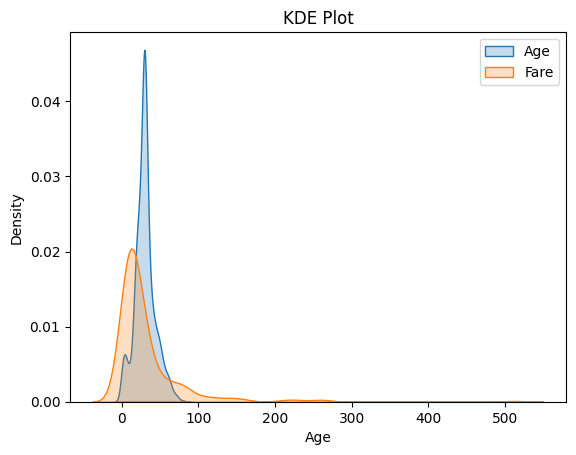

In [ ]:
sns.kdeplot(X['Age'], fill=True, label='Age')
sns.kdeplot(X['Fare'], fill=True, label='Fare')

# Set labels and title
# plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.legend()
# Display the KDE plot
plt.show()

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

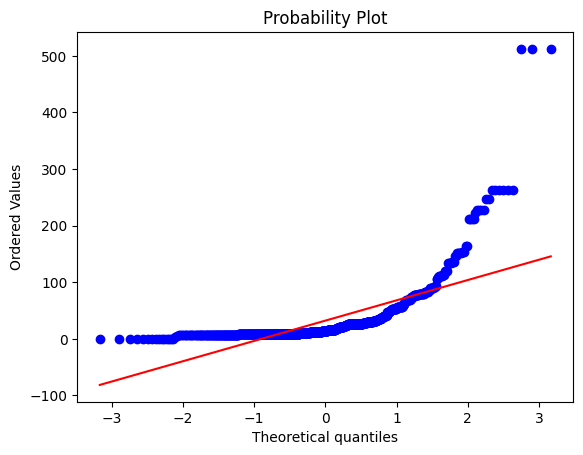

In [ ]:
import scipy.stats as stats
stats.probplot(X['Fare'], dist="norm", plot=plt)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
standardScaler = StandardScaler()

In [ ]:
standardScaler.fit(X[['Age']])

StandardScaler()

In [ ]:
X['Age'] = standardScaler.transform(X[['Age']])

In [ ]:
X['Age']

,Age
0,-0.592481
1,0.638789
2,-0.284663
3,0.407926
4,0.407926
...,...
886,-0.207709
887,-0.823344
888,0.000000
889,-0.284663


In [ ]:
minmaxScaler = MinMaxScaler()

In [ ]:
minmaxScaler.fit(X[['Fare']])
X['Fare'] = minmaxScaler.transform(X[['Fare']])

In [ ]:
X['Fare']

,Fare
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


#### Encoding the categorical values
#### Two ways: Ordinal and OneHotEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
ordinal = OrdinalEncoder()

In [ ]:
X['Sex'] = ordinal.fit_transform(X[['Sex']])

In [ ]:
onehot = OneHotEncoder(sparse_output=True)

In [ ]:
embarked = onehot.fit_transform(X[['Embarked']])

In [ ]:
feature_names = onehot.get_feature_names_out()

In [ ]:
feature_names

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [ ]:
embarked_df = pd.DataFrame(embarked.toarray(), columns=feature_names)

In [ ]:
embarked_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [ ]:
X = pd.concat([X, embarked_df],axis=1).drop(columns=['Embarked'])

#### Combining and Pipelining

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X_pipeline = train_data.drop(columns=['Survived','Ticket', 'PassengerId', 'Cabin','Name'])

In [ ]:
age_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

fare_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

embarked_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

sex_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('sex_transformer', sex_transformer, ['Sex']),
        ('age_transformer', age_transformer, ['Age']),
        ('fare_transformer', fare_transformer, ['Fare']),
        ('embarked_transformer', embarked_transformer, ['Embarked'])
    ],remainder='passthrough',)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

X_transformed = pipeline.fit_transform(X_pipeline)

In [ ]:
new_order = ['Sex','Age','Fare','Embarked_C', 'Embarked_Q',	'Embarked_S','Pclass', 'SibSp',	'Parch']

In [ ]:
pd.DataFrame(X_transformed,columns=new_order)

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass,SibSp,Parch
0,1.0,-0.592481,0.014151,0.0,0.0,1.0,3.0,1.0,0.0
1,0.0,0.638789,0.139136,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,-0.284663,0.015469,0.0,0.0,1.0,3.0,0.0,0.0
3,0.0,0.407926,0.103644,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.407926,0.015713,0.0,0.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,1.0,-0.207709,0.025374,0.0,0.0,1.0,2.0,0.0,0.0
887,0.0,-0.823344,0.058556,0.0,0.0,1.0,1.0,0.0,0.0
888,0.0,0.000000,0.045771,0.0,0.0,1.0,3.0,1.0,2.0
889,1.0,-0.284663,0.058556,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,-0.592481,1,0,0.014151,0.0,0.0,1.0


## Do the same for the Dataset in link: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset - [10 marks]

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulugbekshernazarov","key":"04a6f70b9e9b10a3c9cfb00e5ddb14c2"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download sujithmandala/simple-loan-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/1.05k [00:00<?, ?B/s]
100% 1.05k/1.05k [00:00<00:00, 2.34MB/s]


In [ ]:
!unzip simple-loan-classification-dataset.zip

Archive:  simple-loan-classification-dataset.zip
  inflating: loan.csv                


In [ ]:
df = pd.read_csv('loan.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [ ]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [ ]:
df.isna().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


Standardization and Scaling

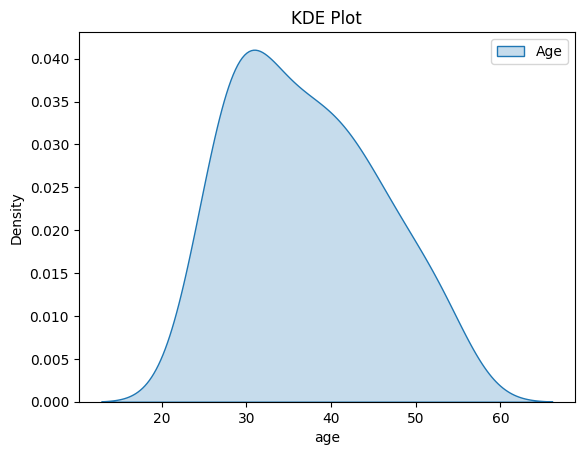

In [ ]:
sns.kdeplot(df['age'], fill=True, label='Age')
# sns.kdeplot(df['income'], fill=True, label='income')
# sns.kdeplot(df['credit_score'], fill=True, label='credit_score')

# Set labels and title
# plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.legend()
# Display the KDE plot
plt.show()

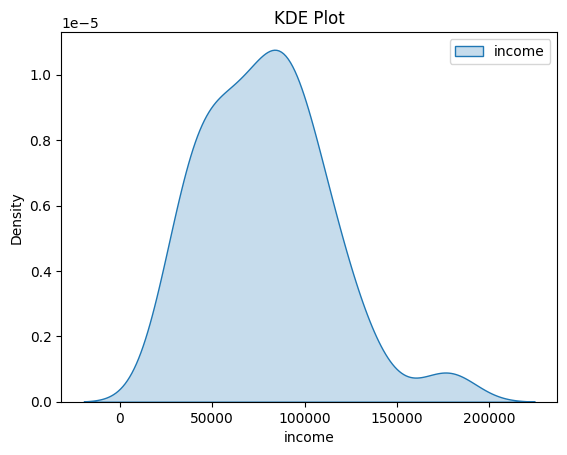

In [ ]:
# sns.kdeplot(df['age'], fill=True, label='Age')
sns.kdeplot(df['income'], fill=True, label='income')
# sns.kdeplot(df['credit_score'], fill=True, label='credit_score')

# Set labels and title
# plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.legend()
# Display the KDE plot
plt.show()

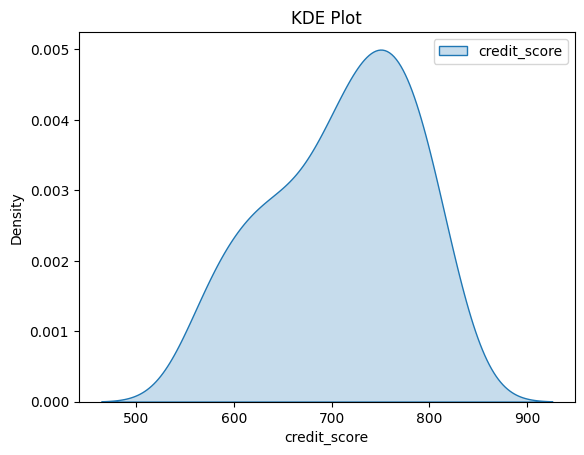

In [ ]:
# sns.kdeplot(df['age'], fill=True, label='Age')
# sns.kdeplot(df['income'], fill=True, label='income')
sns.kdeplot(df['credit_score'], fill=True, label='credit_score')

# Set labels and title
# plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.legend()
# Display the KDE plot
plt.show()

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([ 25000,  28000,  30000,  32000,  35000,  35000,  38000,  40000,
          42000

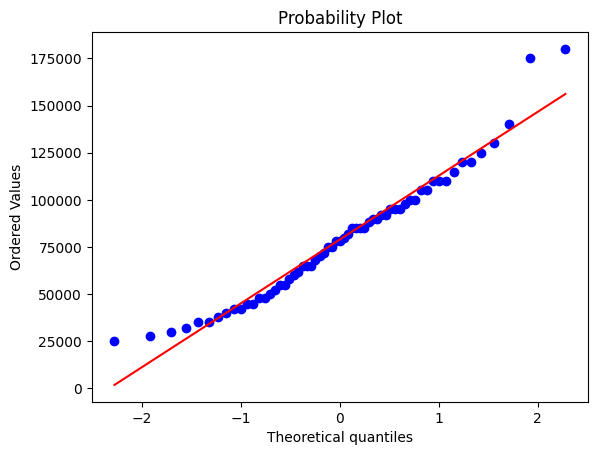

In [ ]:
import scipy.stats as stats
stats.probplot(df['income'], dist="norm", plot=plt)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
standardScaler = StandardScaler()

In [ ]:
standardScaler.fit(df[['age']])

StandardScaler()

In [ ]:
df['age'] = standardScaler.transform(df[['age']])

In [ ]:
df['age']

,age
0,-0.608224
1,0.947653
2,-1.086956
3,1.665750
4,-0.129493
...,...
56,0.229556
57,-1.446005
58,0.708287
59,-0.847590


In [ ]:
standardScaler.fit(df[['credit_score']])
df['credit_score'] = standardScaler.transform(df[['credit_score']])
df['credit_score']

,credit_score
0,0.141015
1,-0.413949
2,-1.662618
3,0.973462
4,0.002274
...,...
56,0.834721
57,-1.940100
58,0.695980
59,-0.830172


In [ ]:
minmaxScaler = MinMaxScaler()

In [ ]:
minmaxScaler.fit(df[['income']])
df['income'] = minmaxScaler.transform(df[['income']])

In [ ]:
X['Fare']

,Fare
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


#### Encoding the categorical values
#### Two ways: Ordinal and OneHotEncoder

In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,-0.608224,Male,Engineer,Bachelor's,Married,0.387097,0.141015,Approved
1,0.947653,Female,Teacher,Master's,Single,0.238710,-0.413949,Approved
2,-1.086956,Male,Student,High School,Single,0.000000,-1.662618,Denied
3,1.665750,Female,Manager,Bachelor's,Married,0.516129,0.973462,Approved
4,-0.129493,Male,Accountant,Bachelor's,Married,0.322581,0.002274,Approved


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
ordinal = OrdinalEncoder()

In [ ]:
df['occupation'] = ordinal.fit_transform(df[['occupation']])

In [ ]:
df['gender'] = ordinal.fit_transform(df[['gender']])
df['marital_status'] = ordinal.fit_transform(df[['marital_status']])
df['loan_status'] = ordinal.fit_transform(df[['loan_status']])

In [ ]:
onehot = OneHotEncoder(sparse_output=True)

In [ ]:
embarked = onehot.fit_transform(df[['education_level']])

In [ ]:
feature_names = onehot.get_feature_names_out()

In [ ]:
feature_names

array(["education_level_Associate's", "education_level_Bachelor's",
       'education_level_Doctoral', 'education_level_High School',
       "education_level_Master's"], dtype=object)

In [ ]:
embarked_df = pd.DataFrame(embarked.toarray(), columns=feature_names)

In [ ]:
embarked_df

,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
56,0.0,0.0,0.0,0.0,1.0
57,0.0,0.0,0.0,1.0,0.0
58,0.0,1.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,1.0


In [ ]:
df = pd.concat([df, embarked_df],axis=1).drop(columns=['education_level'])

In [ ]:
df.head()

,age,gender,occupation,marital_status,income,credit_score,loan_status,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,-0.608224,1.0,12.0,0.0,0.387097,0.141015,0.0,0.0,1.0,0.0,0.0,0.0
1,0.947653,0.0,35.0,1.0,0.238710,-0.413949,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.086956,1.0,33.0,1.0,0.000000,-1.662618,1.0,0.0,0.0,0.0,1.0,0.0
3,1.665750,0.0,16.0,0.0,0.516129,0.973462,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.129493,1.0,0.0,0.0,0.322581,0.002274,0.0,0.0,1.0,0.0,0.0,0.0


#### Combining and Pipelining

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('loan.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
X_pipeline = df

In [ ]:
age_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

fare_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

embarked_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

sex_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('gender_transformer', sex_transformer, ['gender']),
        ('occupation_transformer', sex_transformer, ['occupation']),
        ('marital_status_transformer', sex_transformer, ['marital_status']),
        ('loan_status_status_transformer', sex_transformer, ['loan_status']),
        ('age_transformer', age_transformer, ['age']),
        ('income_transformer', fare_transformer, ['income']),
        ('credit_score_transformer', fare_transformer, ['credit_score']),
        ('education_level_status_transformer', embarked_transformer, ['education_level'])
    ],remainder='passthrough',)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

X_transformed = pipeline.fit_transform(X_pipeline)

In [ ]:
new_order = ['gender','occupation','marital_status', 'loan_status', 'age', 'income',	'credit_score','education_level_A', 'education_level_B',	'education_level_C', 'education_level_M', 'education_level_D']

In [ ]:
df_train = pd.DataFrame(X_transformed,columns=new_order)
df_train.head()

,gender,occupation,marital_status,loan_status,age,income,credit_score,education_level_A,education_level_B,education_level_C,education_level_M,education_level_D
0,1.0,12.0,0.0,0.0,-0.608224,0.387097,0.592593,0.0,1.0,0.0,0.0,0.0
1,0.0,35.0,1.0,0.0,0.947653,0.238710,0.444444,0.0,0.0,0.0,0.0,1.0
2,1.0,33.0,1.0,1.0,-1.086956,0.000000,0.111111,0.0,0.0,0.0,1.0,0.0
3,0.0,16.0,0.0,0.0,1.665750,0.516129,0.814815,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,-0.129493,0.322581,0.555556,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.head(1)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved


In [ ]:
X = df_train.drop(['loan_status'], axis=1)
y = df_train['loan_status']

X.shape, y.shape

((61, 11), (61,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((48, 11), (13, 11))

In [ ]:
X_train.head()

,gender,occupation,marital_status,age,income,credit_score,education_level_A,education_level_B,education_level_C,education_level_M,education_level_D
3,0.0,16.0,0.0,1.665750,0.516129,0.814815,0.0,1.0,0.0,0.0,0.0
53,0.0,17.0,0.0,0.827970,0.387097,0.666667,0.0,0.0,0.0,0.0,1.0
17,0.0,20.0,0.0,0.468921,0.645161,0.888889,0.0,0.0,1.0,0.0,0.0
8,1.0,14.0,0.0,-0.009810,0.432258,0.703704,0.0,0.0,0.0,0.0,1.0
6,1.0,15.0,0.0,0.588604,0.612903,0.851852,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train.head()

,loan_status
3,0.0
53,0.0
17,0.0
8,0.0
6,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

logistic_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

svm_pipeline = Pipeline([
    ('classifier', SVC())
])

random_forest_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

logistic_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)

logistic_pred = logistic_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
rf_pred = random_forest_pipeline.predict(X_test)

accuracy_score(y_test, logistic_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred)

(1.0, 0.6923076923076923, 0.9230769230769231)

In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy_score(y_test, y_pred), best_model

(1.0,
 Pipeline(steps=[('classifier',
                  RandomForestClassifier(max_depth=20, n_estimators=200))]))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



[[9 0]
 [0 4]]


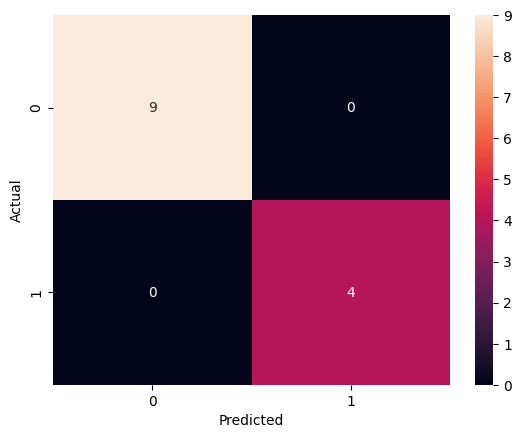

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()